In [1]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
input_file = 'HepG2_SDOC_active_result.tsv'
infos = pd.read_csv(input_file, sep="\t", header=None)
infos

,0,1,2,3,4,5
0,chr1,2190000,3430000,28,0.437330,0.701728
1,chr1,3430000,5990000,7,1.050111,-0.563636
2,chr1,5990000,6040000,0,0.003852,-1.166863
3,chr1,6040000,6700000,4,0.203751,-0.196871
4,chr1,6700000,7660000,2,0.222518,-0.496015
...,...,...,...,...,...,...
2637,chr9,136730000,136790000,0,0.006576,-1.166863
2638,chr9,136790000,136940000,3,0.024912,1.236501
2639,chr9,136940000,137120000,2,0.046040,0.363575
2640,chr9,137120000,137280000,5,0.032555,1.410098


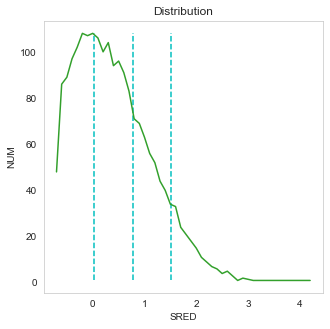

In [3]:
result = infos.loc[infos[3]>0].loc[:,5].round(1).value_counts().sort_index()
x = result.index.tolist()
y = result.values.tolist()

_sigma = infos.loc[infos[3]>0].loc[:,5].std()
_min = infos.loc[infos[3]>0].loc[:,5].min()
_thresholds = [_min+i*_sigma for i in range(1, 4)]

sns.set_style("whitegrid") 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharey=True)
axes.grid(False)
axes.plot(x, y, color=(51/255, 160/255, 44/255))

plt.xlabel('SRED')
plt.ylabel('NUM')
plt.title('Distribution')

for i in range(3):
    plt.vlines(_thresholds[i], result.values.min(), result.values.max(), colors = "c", linestyles = "dashed")
plt.savefig('figure_file/a.pdf')
plt.show()

In [4]:
Homo_sapiens_GRCh38_file = '/data1/lmh_data/MINE/source/Homo_sapiens.GRCh38.84.gtf'
Homo_sapiens_GRCh38 = dict()
with open(Homo_sapiens_GRCh38_file, 'r')as f:
    for line in f:
        datas = line.strip().split()
        if len(datas) < 4:
            continue
        if datas[2] != "gene":
            continue
        gene_id = datas[9].split('"')[1]
        Homo_sapiens_GRCh38[gene_id] = [datas[0], int(datas[3]), int(datas[4])]

RNA_seq_file = '/data1/lmh_data/MINE/source/HepG2/RNA_seq_rpkms.xls'
rna_infos = pd.read_excel(RNA_seq_file)
rna_infos["rna_rpkms_avg"] = rna_infos[["SS_FSU_43_none_RNAseq", "SS_FSU_44_none_RNAseq"]].mean(axis=1)
rna_infos = rna_infos.loc[rna_infos["rna_rpkms_avg"]>0]
rna_infos.insert(rna_infos.shape[1], 'Chromosome', '')
rna_infos.insert(rna_infos.shape[1], 'Gene start (bp)', 0)
rna_infos.insert(rna_infos.shape[1], 'Gene end (bp)', 0)
for index in rna_infos.index:
    if rna_infos.loc[index]["Geneid"] not in Homo_sapiens_GRCh38.keys():
        continue
    data = Homo_sapiens_GRCh38[rna_infos.loc[index]["Geneid"]]
    rna_infos.loc[index, "Chromosome"] = data[0]
    rna_infos.loc[index, "Gene start (bp)"] = data[1]
    rna_infos.loc[index, "Gene end (bp)"] = data[2]
rna_infos

,Geneid,SS_FSU_39_none_RNAseq,SS_FSU_40_none_RNAseq,SS_FSU_41_none_RNAseq,SS_FSU_42_none_RNAseq,SS_FSU_43_none_RNAseq,SS_FSU_44_none_RNAseq,SS_FSU_45_none_RNAseq,SS_FSU_46_none_RNAseq,rna_rpkms_avg,Chromosome,Gene start (bp),Gene end (bp)
2,ENSG00000278267,0.000,0.000,0.000,0.000,2.881,8.668,1.957,3.044,5.7745,1,17369,17436
9,ENSG00000238009,0.000,0.000,0.000,0.000,0.049,0.010,0.029,0.010,0.0295,1,89295,133723
12,ENSG00000268903,0.000,0.000,0.000,0.000,0.228,0.536,0.753,0.290,0.3820,1,135141,135895
13,ENSG00000269981,0.000,0.000,0.000,0.000,0.729,0.728,1.070,0.770,0.7285,1,137682,137965
15,ENSG00000241860,0.000,0.000,0.000,0.000,0.104,0.093,0.058,0.039,0.0985,1,141474,173862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60573,ENSG00000276112,0.000,0.000,0.000,0.000,3.858,3.473,0.606,1.648,3.6655,KI270733.1,124758,124937
60582,ENSG00000275104,158.948,186.994,178.420,145.462,1.756,1.696,0.544,2.084,1.7260,KI270733.1,169844,170023
60595,ENSG00000273748,0.000,0.000,0.000,0.000,0.492,0.176,0.432,0.715,0.3340,GL000219.1,54224,83311
60633,ENSG00000278384,0.000,0.000,0.000,0.000,1.111,0.911,0.853,1.156,1.0110,GL000218.1,51867,54893


In [5]:
# infos.insert(infos.shape[1], 'RNA_rpkms', 0)
for index in infos.index:
    _chr, _start, _end = infos.loc[index][0], infos.loc[index][1], infos.loc[index][2]
    temp = rna_infos.loc[rna_infos["Chromosome"]==_chr[3:]]
    temp = temp.loc[temp["Gene start (bp)"]>=_start].loc[temp["Gene end (bp)"]<=_end]
    result = temp[["rna_rpkms_avg"]].mean()
    infos.loc[index, "RNA_rpkms"] = math.log(result["rna_rpkms_avg"], 2)


In [6]:
colors = [
    (0, 159/255, 232/255),
    (222/255, 28/255, 38/255),
    (0, 191/255, 82/255),
    (255/255, 122/255, 23/255)
]
my_pal = {"small": colors[0], "middle": colors[1], "high": colors[2], "very_high": colors[3]}

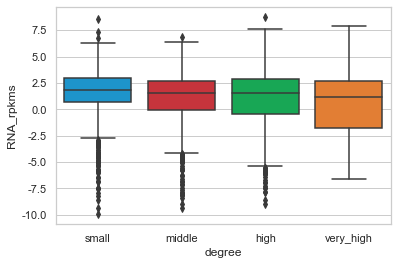

In [7]:
small = infos.loc[infos[3]>0].loc[infos[5]<_thresholds[0]].copy()
middle = infos.loc[infos[3]>0].loc[infos[5]>=_thresholds[0]].loc[infos[5]<_thresholds[1]].copy()
high = infos.loc[infos[3]>0].loc[infos[5]>=_thresholds[1]].loc[infos[5]<_thresholds[2]].copy()
very_high = infos.loc[infos[3]>0].loc[infos[5]>=_thresholds[2]].copy()

small["degree"] = "small"
middle["degree"] = "middle"
high["degree"] = "high"
very_high["degree"] = "very_high"

df = pd.concat([small, middle, high, very_high])

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="degree", y="RNA_rpkms", data=df, palette=my_pal)
fig = ax.get_figure()
fig.savefig('figure_file/b.pdf')

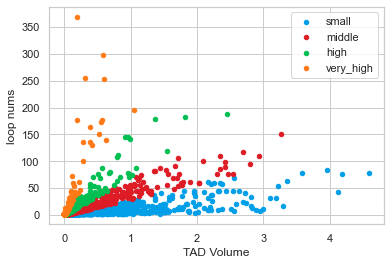

In [8]:
small["TAD Volume"] = small.loc[:, 4]
middle["TAD Volume"] = middle.loc[:, 4]
high["TAD Volume"] = high.loc[:, 4]
very_high["TAD Volume"] = very_high.loc[:, 4]

small["loop nums"] = small.loc[:, 3]
middle["loop nums"] = middle.loc[:, 3]
high["loop nums"] = high.loc[:, 3]
very_high["loop nums"] = very_high.loc[:, 3]

ax = small.plot.scatter(x='TAD Volume', y='loop nums', color=my_pal["small"], label='small')
ax = middle.plot.scatter(x='TAD Volume', y='loop nums', color=my_pal["middle"], label='middle', ax=ax)
ax = high.plot.scatter(x='TAD Volume', y='loop nums', color=my_pal["high"], label='high', ax=ax)
ax = very_high.plot.scatter(x='TAD Volume', y='loop nums', color=my_pal["very_high"], label='very_high', ax=ax)

fig = ax.get_figure()
fig.savefig('figure_file/c.pdf')

In [9]:
Gene_table = pd.read_csv("/data1/lmh_data/MINE/source/Gene_table_20211231.txt", sep="\t")

/home/lmh/anaconda3/envs/MMSR/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
_mean = very_high[["RNA_rpkms"]].mean()["RNA_rpkms"]
low_rpkms = very_high.loc[very_high["RNA_rpkms"]<=_mean].copy()
for index in low_rpkms.index:
    _chr, _start, _end = low_rpkms.loc[index][0], low_rpkms.loc[index][1], low_rpkms.loc[index][2]
    temp = rna_infos.loc[rna_infos["Chromosome"]==_chr[3:]]
    temp = temp.loc[temp["Gene start (bp)"]>=_start].loc[temp["Gene end (bp)"]<=_end]
    geneids = temp["Geneid"].tolist()
    gene_names = set()
    for gene_id in geneids:
        gene_names = gene_names | set(Gene_table.loc[Gene_table["Gene stable ID"]==gene_id]["Gene name"].tolist())
    gene_names -= {np.nan}
    low_rpkms.loc[index, "Gene names"] = ','.join(list(gene_names))
low_rpkms.to_csv('active_very_high(low_rpkms).csv')
low_rpkms

,0,1,2,3,4,5,RNA_rpkms,degree,TAD Volume,loop nums,Gene names
313,chr10,35640000,42870000,150,0.526906,1.833370,0.031189,very_high,0.526906,150,"BMS1,ZNF33BP1,ZNF37CP,ZNF25,ARL6IP1P2,TLK2P2,Z..."
379,chr10,103710000,103860000,4,0.014859,1.771287,-3.795859,very_high,0.014859,4,SH3PXD2A-AS1
388,chr10,110920000,111070000,3,0.017399,1.514125,-2.365871,very_high,0.017399,3,RPL13AP6
404,chr10,124740000,124800000,1,0.003229,1.904782,0.062122,very_high,0.003229,1,EEF1AKMT2
460,chr11,47850000,57270000,173,0.550515,1.923776,-0.215915,very_high,0.550515,173,"OR4C6,PTPRJ,OR5D17P,SEPTIN7P11,TMEM230P2"
492,chr11,87290000,87340000,2,0.004777,2.150551,-0.777195,very_high,0.004777,2,PSMA2P1
751,chr14,45270000,49580000,130,0.416137,1.914312,-1.982791,very_high,0.416137,130,"DNAJC19P9,RPL13AP2"
755,chr14,50320000,50530000,2,0.009761,1.594503,-3.395929,very_high,0.009761,2,CDKL1
759,chr14,51280000,51780000,8,0.028737,1.805293,-0.828793,very_high,0.028737,8,"FRMD6-AS1,FRMD6"
768,chr14,55190000,55440000,4,0.017253,1.669309,0.403891,very_high,0.017253,4,"FBXO34,CHMP4BP1,ATG14,HMGN1P1,FBXO34-AS1"


In [11]:
def find_special_tad(df):
    df = df.copy()
    df["score"] = df["TAD Volume"] * df["loop nums"]
    _special = df.sort_values(by="score", ascending=False)[:5].copy()
    for index in _special.index:
        _chr, _start, _end = _special.loc[index][0], _special.loc[index][1], _special.loc[index][2]
        temp = rna_infos.loc[rna_infos["Chromosome"]==_chr[3:]]
        temp = temp.loc[temp["Gene start (bp)"]>=_start].loc[temp["Gene end (bp)"]<=_end]
        geneids = temp["Geneid"].tolist()
        gene_names = set()
        for gene_id in geneids:
            gene_names = gene_names | set(Gene_table.loc[Gene_table["Gene stable ID"]==gene_id]["Gene name"].tolist())
        gene_names -= {np.nan}
        _special.loc[index, "Gene names"] = ','.join(list(gene_names))
    return _special

In [12]:
find_special_tad(small).to_csv('active_small(special).csv')
find_special_tad(small)

,0,1,2,3,4,5,RNA_rpkms,degree,TAD Volume,loop nums,score,Gene names
1178,chr18,36820000,45660000,78,4.586879,-0.276525,-1.500218,small,4.586879,78,357.776583,"LINC00907,PIK3C3,RPL7AP66,KRT8P5,KIAA1328,SETB..."
566,chr12,15520000,21690000,83,3.959463,-0.159474,2.427368,small,3.959463,83,328.635391,"RPL7P6,GYS2,MGST1,EPS8,GOLT1B,EGLN3P1,PLEKHA5,..."
721,chr13,80370000,94370000,77,4.183202,-0.230345,-1.906290,small,4.183202,77,322.106569,"GPC6-AS2,GPC6-AS1,TET1P1,HNRNPA1P29,PTMAP5,SP3..."
677,chr12,124820000,130750000,79,3.586765,-0.129741,1.766666,small,3.586765,79,283.354404,"UBC,SLC15A4,MIR5188,BRI3BP,DHX37,TMEM132B,AACS..."
635,chr12,76620000,82360000,63,3.356836,-0.225517,0.949815,small,3.356836,63,211.480695,"LIN7A,SYT1,ACSS3,PPFIA2,E2F7,CSRP2,CCDC59,ZDHH..."


In [13]:
find_special_tad(middle).to_csv('active_middle(special).csv')
find_special_tad(middle)

,0,1,2,3,4,5,RNA_rpkms,degree,TAD Volume,loop nums,score,Gene names
711,chr13,51850000,72710000,151,3.264160,0.435213,1.312719,middle,3.264160,151,492.888162,"OLFM4,RNU6-80P,NEK5,RPSAP53,DIAPH3-AS1,ATP7B,M..."
636,chr12,82360000,88030000,109,2.934276,0.233661,-0.387254,middle,2.934276,109,319.836077,"LRRIQ1,TMTC2,MKRN9P,RPL6P25"
1909,chr4,127780000,139020000,118,2.689355,0.375835,0.982996,middle,2.689355,118,317.343915,"HSPA4L,LARP1B,LINC00616,JADE1,SLC7A11,LINC0246..."
1862,chr4,57160000,67390000,94,2.805685,0.153118,-1.622969,middle,2.805685,94,263.734364,"LARP1BP1,EPHA5,EXOC5P1,IFITM3P1"
1750,chr3,79030000,88150000,109,2.341730,0.439375,0.907808,middle,2.341730,109,255.248617,"CHMP2B,CBX5P1,GBE1,CYP51A1P1,PPATP1,CADM2,HTR1..."


In [14]:
find_special_tad(high).to_csv('active_high(special).csv')
find_special_tad(high)

,0,1,2,3,4,5,RNA_rpkms,degree,TAD Volume,loop nums,score,Gene names
1372,chr2,74890000,85060000,188,2.448587,0.863888,3.736622,high,2.448587,188,460.334404,"MIR5000,SUPT4H1P1,LRRTM4,TMSB10,LINC01291,CYCS..."
1953,chr5,17210000,31580000,182,1.819417,1.087393,0.996943,high,1.819417,182,331.133816,"PURPL,HSPD1P1,C5orf22,GUSBP1,LINC02211,CDH10,D..."
1961,chr5,39570000,52660000,178,1.366225,1.290934,2.418796,high,1.366225,178,243.187982,"FBXO4,PAIP1,PTGER4,CCDC152,OXCT1,NIM1K,ANXA2R,..."
449,chr11,36510000,43310000,119,1.552177,0.862723,-0.958056,high,1.552177,119,184.709072,"RAG1,IFTAP,RAG2"
2145,chr6,63810000,70210000,142,0.998779,1.344664,0.693855,high,0.998779,142,141.826602,"NPM1P37,GAPDHP42,LMBRD1,NUFIP1P1,GCNT1P4"


In [15]:
find_special_tad(very_high).to_csv('active_very_high(special).csv')
find_special_tad(very_high)

,0,1,2,3,4,5,RNA_rpkms,degree,TAD Volume,loop nums,score,Gene names
2148,chr6,75530000,82250000,195,1.056098,1.540297,2.173309,very_high,1.056098,195,205.939148,"TENT5A,RNU6-1016P,TTK,BCKDHB,MYO6,ELOVL4,LCA5,..."
1379,chr2,88740000,98390000,297,0.581795,2.330891,3.389207,very_high,0.581795,297,172.792982,"ZAP70,FER1L5,GGT8P,ANKRD36B,COX5B,SEMA4C,NEURL..."
2285,chr7,56370000,67000000,253,0.605054,2.140837,0.987824,very_high,0.605054,253,153.078632,"KCTD7,ZNF107,INTS4P2,SNORA22,ZNF680,RSL24D1P3,..."
319,chr10,45460000,48660000,177,0.562224,1.930548,2.474686,very_high,0.562224,177,99.513585,"FRMPD2B,BMS1P1,AGAP4,SHLD2P3,FRMPD2,WASHC2C,FA..."
460,chr11,47850000,57270000,173,0.550515,1.923776,-0.215915,very_high,0.550515,173,95.239134,"OR4C6,PTPRJ,OR5D17P,SEPTIN7P11,TMEM230P2"
